In [2]:
import numpy as np
from math import cos, sin, tan, exp, radians, sqrt, log
from numpy import arange
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def rho(y):
    po = 101325
    L = 0.0065
    To = 288.15
    g = 9.8
    M = 0.0289644
    R = 8.31447 
    rhoo = po*M/R*To
    Hn = 1/(((g*M)/(R*To))-(L/To))
    return rhoo*exp(-y/Hn)

In [ ]:
#INFORMAÇÕES
#Altura do estadio 162m (fonte google earth)
#Velocidade da bola 130 km/h 
#Distancia da  baliza 35m
#Velocidade bola 38m/s

(162.0, 166.0)

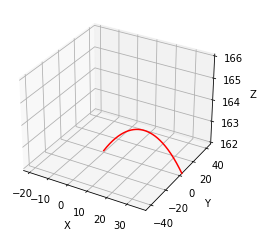

In [8]:
vo = 38
phi = 12
teta = 82
wx = 0
wy = 0
wz = 88
xo = 0
yo = 0
zo = 162
k = 0.01
cd = 0.05
cm = 0.01           
g = 9.8

def dvx(vx,vy,vz,z):
    return -k*((cd*vx*(rho(z)/rho(0)))+(cm*((wy*vz)-(wz*vy))))*sqrt(((vx)**2)+(vy**2)+(vz**2))
def drx(vx):
    return vx
def dvy(vx,vy,vz,z):
    return -k*((cd*vy*(rho(z)/rho(0)))+(cm*((wz*vx)-(wx*vz))))*sqrt(((vx)**2)+(vy**2)+(vz**2))
def dry(vy):
    return vy
def dvz(vx,vy,vz,z):
    return -g-(k*((cd*vz*(rho(z)/rho(0)))+(cm*((wx*vy)-(wy*vx))))*sqrt(((vx)**2)+(vy**2)+(vz**2)))
def drz(vz):
    return vz
vx = [vo*cos(radians(phi))*sin(radians(teta))]
vy = [vo*sin(radians(phi))*sin(radians(teta))]
vz = [vo*cos(radians(teta))]
x = [xo]
y = [yo]
z = [zo]
h = 0.001
i = 0

while z[i] >= zo:
    k1x = drx(vx[i])
    k1y = dry(vy[i])
    k1z = drz(vz[i])
    k1vx = dvx(vx[i],vy[i],vz[i],z[i])
    k1vy = dvy(vx[i],vy[i],vz[i],z[i])
    k1vz = dvz(vx[i],vy[i],vz[i],z[i])
    k2x = drx(vx[i]+((k1vx*h)/2))
    k2y = dry(vy[i]+((k1vy*h)/2))
    k2z = drz(vz[i]+((k1vz*h)/2))
    k2vx = dvx(vx[i]+((k1vx*h)/2),vy[i]+((k1vy*h)/2),vz[i]+((k1vz*h)/2),z[i]+((k1z*h)/2))
    k2vy = dvy(vx[i]+((k1vx*h)/2),vy[i]+((k1vy*h)/2),vz[i]+((k1vz*h)/2),z[i]+((k1z*h)/2))
    k2vz = dvz(vx[i]+((k1vx*h)/2),vy[i]+((k1vy*h)/2),vz[i]+((k1vz*h)/2),z[i]+((k1z*h)/2))
    k3x = drx(vx[i]+((k2vx*h)/2))
    k3y = dry(vy[i]+((k2vy*h)/2))
    k3z = drz(vz[i]+((k2vz*h)/2))
    k3vx = dvx(vx[i]+((k2vx*h)/2),vy[i]+((k2vy*h)/2),vz[i]+((k2vz*h)/2),z[i]+((k2z*h)/2))
    k3vy = dvy(vx[i]+((k2vx*h)/2),vy[i]+((k2vy*h)/2),vz[i]+((k2vz*h)/2),z[i]+((k2z*h)/2))
    k3vz = dvz(vx[i]+((k2vx*h)/2),vy[i]+((k2vy*h)/2),vz[i]+((k2vz*h)/2),z[i]+((k2z*h)/2))
    k4x = drx(vx[i]+(k3vx*h))
    k4y = dry(vy[i]+(k3vy*h))
    k4z = drz(vz[i]+(k3vz*h))
    k4vx = dvx(vx[i]+(k3vx*h),vy[i]+(k3vy*h),vz[i]+(k3vz*h),z[i]+(k3z*h))
    k4vy = dvy(vx[i]+(k3vx*h),vy[i]+(k3vy*h),vz[i]+(k3vz*h),z[i]+(k3z*h))
    k4vz = dvz(vx[i]+(k3vx*h),vy[i]+(k3vy*h),vz[i]+(k3vz*h),z[i]+(k3z*h))
    x.append(x[i]+(h*(k1x+2*k2x+2*k3x+k4x)/6))
    y.append(y[i]+(h*(k1y+2*k2y+2*k3y+k4y)/6))
    z.append(z[i]+(h*(k1z+2*k2z+2*k3z+k4z)/6))
    vx.append(vx[i]+(h*(k1vx+2*k2vx+2*k3vx+k4vx)/6))
    vy.append(vy[i]+(h*(k1vy+2*k2vy+2*k3vy+k4vy)/6))
    vz.append(vz[i]+(h*(k1vz+2*k2vz+2*k3vz+k4vz)/6))
    i += 1
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z,'red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-22,38)
ax.set_ylim(-45,45)
ax.set_zlim(162,166)